# Assignment 5(due on 12/20)

## Student:胡蓓慧（12332288），Gtihub：beihuihu
## 批改人：张鹏

## 得分：39/40+15/15

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import matplotlib.ticker as ticker
%matplotlib inline

## 1. Modeling of carbon cycle

1.1 [15 points] Following equation 1-2 (without the buffer effect), build a two-box model to compute the atmospheric $CO_2$ level in ppm (parts per million) from 1987 to 2004.
$$ \frac{dN_1}{dt}=-k_{12}N_1+k_{21}N_2+\gamma$$
$$ \frac{dN_2}{dt}=k_{12}N_1-k_{21}N_2$$
where $N_1$ and $N_2$ denote the concentration of carbon in the atmosphere and the surface of the ocean, respectively, t is the time, and the transfer coefficient $k_{ij}$ is the ratio of carbon flux from reservoir i to j divided by the carbon content in reservoir i: $k_{12}=105/740$ and $k_{21}=102/900$,$\gamma$ is the rate of production of $CO_2$ by fossil-fuel burning.\
The value of $CO_2$ concentration in ppm is found by dividing the carbon content in PgC by 2.13.
In 1986, $N_1=347ppm$

In [2]:
fossil_fuel_rate=pd.read_csv('global.1751_2008.csv')#unit:million metric tons of C = 10^12 g of C
ffr=fossil_fuel_rate[(fossil_fuel_rate['Year']>=1987) & (fossil_fuel_rate['Year']<=2004)]['Total carbon emissions from fossil-fuels (million metric tons of C)'].to_list()
ffr=np.array(ffr)/1000/2.13
ffr

array([2.70187793, 2.80187793, 2.85821596, 2.88779343, 2.92910798,
       2.90046948, 2.89765258, 2.95023474, 3.01502347, 3.07511737,
       3.12816901, 3.11643192, 3.09107981, 3.16901408, 3.24694836,
       3.27746479, 3.47276995, 3.65352113])

In [3]:
N1_list=[740/2.13]#347
N2_list=[900/2.13]#422
k12=105/740
k21=102/900
for i in range(0,len(ffr)):
    gamma=ffr[i]
    N1=N1_list[-1]
    N2=N2_list[-1]
    dN1=-k12*N1+k21*N2+gamma
    dN2=k12*N1-k21*N2
    N1_list.append(N1+dN1)
    N2_list.append(N2+dN2)
print('atmospheric  C0_2 level in ppm (parts per million) from 1987 to 2004:')
print(N1_list)

atmospheric  C0_2 level in ppm (parts per million) from 1987 to 2004:
[347.4178403755869, 348.7112676056338, 350.08079241213045, 351.4746641354907, 352.86629324151994, 354.2713413046096, 355.62111273289736, 356.95229141779373, 358.3247025086249, 359.74598833949364, 361.20632273118997, 362.6955078940884, 364.1474041707784, 365.5565833987238, 367.03436119185136, 368.57206201677303, 370.1158067146881, 371.8322999980965, 373.6850326650375]


1.2 [20 points] Following equation 3-4 (with the buffer effect), build a two-box model to compute the atmospheric $CO_2$ level in ppm from 1987 to 2004.
$$ \frac{dN_1}{dt}=-k_{12}N_1+k_{21}(N_2^0+\xi(N_2-N_2^0))+\gamma$$
$$ \frac{dN_2}{dt}=k_{12}N_1-k_{21}(N_2^0+\xi(N_2-N_2^0))$$
In 1986,we let $N_2^0 = 900−79= 821$
The buffer factor $\xi$ depends on the $CO_2$ concentration in the atmosphere and is approximated as a quadratic function of the concentration.
$$\xi(z)\approx 3.69+1.86*10^{-2}z-1.80*10^{-6}z^2$$
where z is the atmospheric $CO_2$ concentration of ppm unit.

In [4]:
N1_list_buffer=[740/2.13]#347
N2_list_buffer=[900/2.13]#422
k12=105/740  #14.2%
k21=102/900  #11.3%
N20=821/2.13 #385.44
#year 1987 to 2004
for i in range(0,len(ffr)):
    gamma=ffr[i]
    N1=N1_list_buffer[-1]
    N2=N2_list_buffer[-1]
    xi=3.69+1.86*0.01*N1-1.8*0.000001*N1*N1
#     print(xi)
    dN1=-k12*N1+k21*(N20+xi*(N2-N20))+gamma
    dN2=k12*N1-k21*(N20+xi*(N2-N20))
    N1_list_buffer.append(N1+dN1)
    N2_list_buffer.append(N2+dN2)
print('atmospheric C0_2 level in ppm (parts per million) from 1987 to 2004 with buffer effect:')
print(N1_list_buffer)

atmospheric C0_2 level in ppm (parts per million) from 1987 to 2004 with buffer effect:
[347.4178403755869, 386.2678248192676, 379.07652231182266, 384.82042129901873, 386.44100423904933, 389.42203173163585, 391.9428548837997, 394.6092220225699, 397.281681136584, 400.0309463872509, 402.83107503883946, 405.6830665948721, 408.5203112074706, 411.33773620479604, 414.23711555982226, 417.206598695532, 420.20333376145396, 423.39618331711085, 426.7497421371073]


1.3 [5 points] Based on your results from 1.1 and 1.2, reproduce Figure 2 in Tomizuka (2009) as much as you can.

In [5]:
Mauna_Loa_observation=pd.read_csv('Mauna_Loa_observation.csv')
Mauna_Loa_observation=Mauna_Loa_observation[(Mauna_Loa_observation['year']>=1986)&(Mauna_Loa_observation['year']<=2004)]
Mauna_Loa_observation

,year,mean,unc
27,1986,347.61,0.12
28,1987,349.31,0.12
29,1988,351.69,0.12
30,1989,353.20,0.12
31,1990,354.45,0.12
32,1991,355.70,0.12
33,1992,356.54,0.12
34,1993,357.21,0.12
35,1994,358.96,0.12
36,1995,360.97,0.12


In [6]:
x=range(1987,2005)
y=N1_list_buffer[1:]
np.polyfit(x, y, 1)

array([ 2.69148252e+00, -4.96862795e+03])

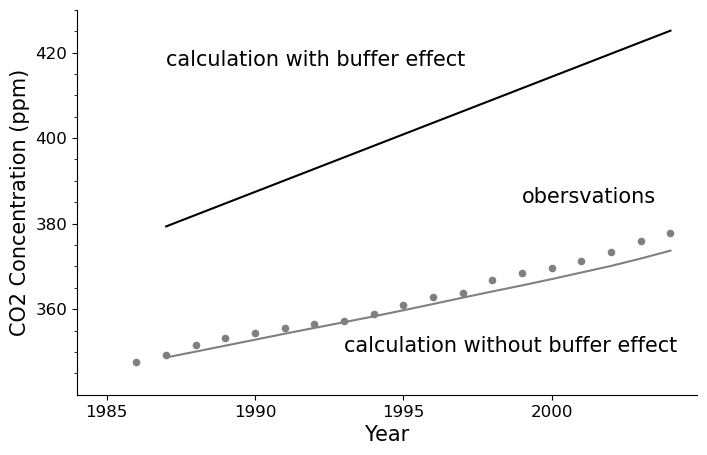

In [7]:
fig, ax=plt.subplots(figsize=(8,5))
year=range(1987,2005)

Mauna_Loa_observation.plot('year','mean',color='gray',kind='scatter',ax=ax,xlim=1984,ylim=[340,430])
plt.plot(year,N1_list[1:],'gray')
#Linear fitting of the results with buffer effect
slope, intercept=np.polyfit(year, N1_list_buffer[1:], 1)
plt.plot(year,slope * year + intercept,'black')

plt.text(1999, 385, 'obersvations',fontsize=15)
plt.text(1987, 417, 'calculation with buffer effect', fontsize=15)
plt.text(1993, 350, 'calculation without buffer effect', fontsize=15)
plt.ylabel('CO2 Concentration (ppm)',fontsize=15)
plt.xlabel('Year',fontsize=15)
xticks=[1985,1990,1995,2000]
yticks=[360,380,400,420]
plt.xticks(xticks,fontsize=12)
plt.yticks(yticks,fontsize=12)
ax.yaxis.set_minor_locator(AutoMinorLocator(4)) #设置小刻度
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 第一问代码思路和结果正确，但是gama值未添加1986年的值
### 第二问代码思路和结果正确，但是gama值未添加1986年的值
### 第三问结果正确，报告分析完整。
### 得分38+1/40

[Bonus] [15 points] Following equation 5-13, compute the atmospheric $CO_2$ level in ppm and reproduce Figure 4 in Tomizuka (2009).
$$f=f^0(1+\beta ln(P/P^0))$$
where $f$ is the net primary productivity (the difference between the carbon uptake rate by photosynthesis and the carbon emission rate by respiration); $f_0$ corresponds to the preindustrial value of $f$. $P$ is the atmospheric $CO_2$ concentration, and $P_0$ is the preindustrial value of $P$. The fertilization factor, or $\beta$ factor, is often chosen to be around 0.42

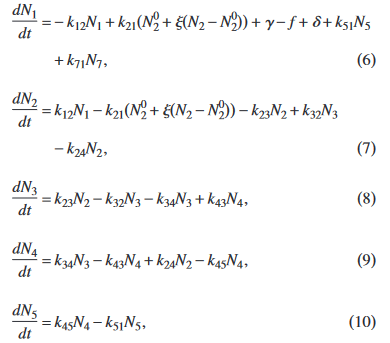

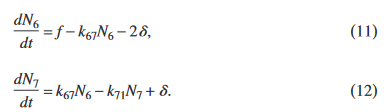\
$\delta$ is the emission rate to the atmosphere by changes in land use, we take $f^0=62 PgC/year $.The atmospheric $CO_2$
concentration before the industrial era is equivalent to 289 ppm

In [8]:
landuse_carbon_flux=pd.read_excel('Global_land-use_flux-1850_2005.xls')# unit 1000 MgC
landuse_carbon_flux=landuse_carbon_flux[landuse_carbon_flux['Year']<=2000]
print(landuse_carbon_flux.head())

#from 1750 to 1850, linearly interpolating from 0.2 to 0.5
delta_before=np.arange(0.2,0.5,(0.5-0.2)/100)
delta_after=np.array(landuse_carbon_flux['Global'].to_list())/1000
deltas=np.concatenate((delta_before,delta_after))/2.13 #1750 to 2000
deltas

   Year  Global       USA  Canada  S+C America   Europe  Nafrica/Meast  \
0  1850   500.6  164.0922  5.5476      23.4757  55.0441         3.9840   
1  1851   492.7  165.7256  5.3626      23.1520  55.0156         3.9839   
2  1852   548.5  230.6725  5.3380      22.8618  54.9874         3.9837   
3  1853   546.8  238.5149  5.3138      22.6017  54.9590         3.9835   
4  1854   544.8  246.1846  5.2899      22.3687  54.9304         3.9833   

   Trop.Africa  Frmr USSR     China  S+SE Asia  Pac.Dev.Reg  
0      -1.3484    58.5571  101.8392    87.3469       2.0458  
1      -1.1192    58.5525   93.0766    86.9100       2.0419  
2      -1.0033    58.8781   83.8307    86.9385       2.0379  
3      -1.0513    59.2207   74.2140    86.9935       2.0338  
4      -0.9855    59.5802   64.3129    87.0630       2.0297  


array([0.09389671, 0.09530516, 0.09671362, 0.09812207, 0.09953052,
       0.10093897, 0.10234742, 0.10375587, 0.10516432, 0.10657277,
       0.10798122, 0.10938967, 0.11079812, 0.11220657, 0.11361502,
       0.11502347, 0.11643192, 0.11784038, 0.11924883, 0.12065728,
       0.12206573, 0.12347418, 0.12488263, 0.12629108, 0.12769953,
       0.12910798, 0.13051643, 0.13192488, 0.13333333, 0.13474178,
       0.13615023, 0.13755869, 0.13896714, 0.14037559, 0.14178404,
       0.14319249, 0.14460094, 0.14600939, 0.14741784, 0.14882629,
       0.15023474, 0.15164319, 0.15305164, 0.15446009, 0.15586854,
       0.157277  , 0.15868545, 0.1600939 , 0.16150235, 0.1629108 ,
       0.16431925, 0.1657277 , 0.16713615, 0.1685446 , 0.16995305,
       0.1713615 , 0.17276995, 0.1741784 , 0.17558685, 0.17699531,
       0.17840376, 0.17981221, 0.18122066, 0.18262911, 0.18403756,
       0.18544601, 0.18685446, 0.18826291, 0.18967136, 0.19107981,
       0.19248826, 0.19389671, 0.19530516, 0.19671362, 0.19812

In [9]:
gammas=fossil_fuel_rate[fossil_fuel_rate['Year']<=2000]['Total carbon emissions from fossil-fuels (million metric tons of C)'].to_list()#1751 to 2000
gammas=np.array(gammas)/1000/2.13
gammas #1751 to 2000

array([1.40845070e-03, 1.40845070e-03, 1.40845070e-03, 1.40845070e-03,
       1.40845070e-03, 1.40845070e-03, 1.40845070e-03, 1.40845070e-03,
       1.40845070e-03, 1.40845070e-03, 1.40845070e-03, 1.40845070e-03,
       1.40845070e-03, 1.40845070e-03, 1.40845070e-03, 1.40845070e-03,
       1.40845070e-03, 1.40845070e-03, 1.40845070e-03, 1.40845070e-03,
       1.87793427e-03, 1.87793427e-03, 1.87793427e-03, 1.87793427e-03,
       1.87793427e-03, 1.87793427e-03, 1.87793427e-03, 1.87793427e-03,
       1.87793427e-03, 1.87793427e-03, 2.34741784e-03, 2.34741784e-03,
       2.34741784e-03, 2.34741784e-03, 2.34741784e-03, 2.34741784e-03,
       2.34741784e-03, 2.34741784e-03, 2.34741784e-03, 2.34741784e-03,
       2.81690141e-03, 2.81690141e-03, 2.81690141e-03, 2.81690141e-03,
       2.81690141e-03, 2.81690141e-03, 3.28638498e-03, 3.28638498e-03,
       3.28638498e-03, 3.75586854e-03, 3.75586854e-03, 4.69483568e-03,
       4.22535211e-03, 4.22535211e-03, 4.22535211e-03, 4.69483568e-03,
      

In [10]:
k12=60/615
k21=60/842
k23=9/842
k24=43/842
k32=52/9744
k34 = 162/9744
k43 = 205/26280
k45 = 0.2/26280
k51 = 0.2/90000000
k67 = 62/731
k71 = 62/1238
f0=62/2.13
N10=615/2.13
N20=842/2.13
N30=9744/2.13
N40=26280/2.13
N50=90000000/2.13
N60=731/2.13
N70=1238/2.13

In [11]:
def cal_N7(beta):
    N1_list=[N10]
    N2_list=[N20]
    N3_list=[N30]
    N4_list=[N40]
    N5_list=[N50]
    N6_list=[N60]
    N7_list=[N70]
    
    for i in range(0,250): #1751 t0 2000
        delta=deltas[i+1] #the emission rate to the atmosphere by changes in land use
        gamma=gammas[i]   #the emission rate to the atmosphere by the burning of fossil fuel
        
        N1=N1_list[-1]
        N2=N2_list[-1]
        N3=N3_list[-1]
        N4=N4_list[-1]
        N5=N5_list[-1]
        N6=N6_list[-1]
        N7=N7_list[-1]
        
        f=f0*(1+beta*math.log(N1/N10,math.e)) #the net primary productivity
        xi=3.69+1.86*0.01*N1-1.8*0.000001*N1*N1
        d_N1=-k12*N1+k21*(N20+xi*(N2-N20))+gamma-f+delta+k51*N5+k71*N7
        d_N2=k12*N1-k21*(N20+xi*(N2-N20))-k23*N2+k32*N3-k24*N2
        d_N3=k23*N2-k32*N3-k34*N3+k43*N4
        d_N4=k34*N3-k43*N4+k24*N2-k45*N4
        d_N5=k45*N4-k51*N5
        d_N6=f-k67*N6-2*delta
        d_N7=k67*N6-k71*N7+delta
    
        N1_list.append(N1+d_N1)
        N2_list.append(N2+d_N2)
        N3_list.append(N3+d_N3)
        N4_list.append(N4+d_N4)
        N5_list.append(N5+d_N5)
        N6_list.append(N6+d_N6)
        N7_list.append(N7+d_N7) 
    return N1_list,N2_list,N3_list,N4_list,N5_list,N6_list,N7_list

In [12]:
N1_b1=cal_N7(beta=0.38)[0]
N1_b2=cal_N7(beta=0.50)[0]
# print(N1_b1)

In [13]:
ice_obser=pd.read_csv('lawdome_observation.dat',sep=',')
ice_obser=ice_obser[(ice_obser['year']>=1750)&(ice_obser['year']<=1960)]
ice_obser

Mauna_Loa_observation=pd.read_csv('Mauna_Loa_observation.csv')
Mauna_Loa_observation=Mauna_Loa_observation[(Mauna_Loa_observation['year']>=1961)&(Mauna_Loa_observation['year']<=2004)]
Mauna_Loa_observation

,year,mean,unc
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
5,1964,319.62,0.12
6,1965,320.04,0.12
7,1966,321.37,0.12
8,1967,322.18,0.12
9,1968,323.05,0.12
10,1969,324.62,0.12
11,1970,325.68,0.12


No handles with labels found to put in legend.


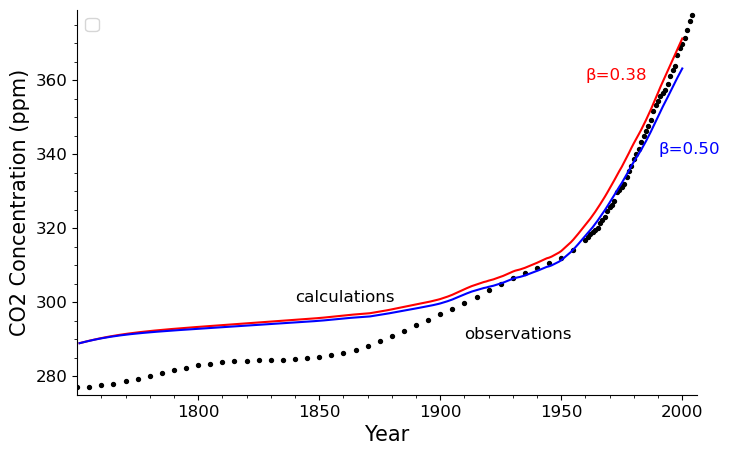

In [14]:
fig, ax=plt.subplots(figsize=(8,5))

year=range(1751,2001)
Mauna_Loa_observation.plot.scatter('year','mean',c='black',s=8,ax=ax,xlim=1750,ylim=[275,379])
ice_obser.plot.scatter('year','ppm',c='black',s=8,ax=ax)
plt.plot(year,N1_b1[1:],'red')
plt.plot(year,N1_b2[1:],'blue')

plt.xlabel('Year',fontsize=15)
xticks=[1800,1850,1900,1950,2000]
yticks=[280,300,320,340,360]
plt.xticks(xticks,fontsize=12)
plt.yticks(yticks,fontsize=12)
plt.ylabel('CO2 Concentration (ppm)',fontsize=15)
plt.legend(loc='best',fontsize=12)
plt.text(1960, 360, 'β=0.38',c='red',fontsize=12)
plt.text(1990, 340, 'β=0.50',c='blue',fontsize=12)
plt.text(1840, 300, 'calculations',c='black',fontsize=12)
plt.text(1910, 290, 'observations',c='black',fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(AutoMinorLocator(5)) #设置小刻度
ax.yaxis.set_minor_locator(AutoMinorLocator(4)) #设置小刻度

### 第三问代码思路和结果基本正确，但注意P0 根据文章APPENDIX应等于290.21，报告分析完整。
### 得分15/15